# 1. Introduction

Predicting whether a loan application will be approved is a common problem faced by banks and financial institutions.  
The goal is to use applicant information (such as income, employment status, education, and loan amount)  
to predict whether the applicant will be granted the loan.

This prediction helps:
- Automate the loan approval process.
- Reduce manual effort and human bias.
- Minimize financial risk.

---

## Business Problem
Loan default is a major risk for banks. Approving a loan to a high-risk applicant can result in financial loss.  
On the other hand, rejecting a loan to a low-risk applicant means lost business opportunities.  
A well-trained machine learning model can help strike the right balance between risk and opportunity.

---

## Approach
We will:
1. Load and explore the dataset.
2. Perform **EDA (Exploratory Data Analysis)**.
3. Handle missing values and preprocess data.
4. Engineer new features for better predictive power.
5. Train multiple machine learning models.
6. Evaluate performance using accuracy, F1-score, and ROC-AUC.
7. Select the best model and make predictions.

---


# 2. Data Loading & Basic Exploration

Extract zip file downloaded using Kaggle API

In [1]:
import zipfile

with zipfile.ZipFile("loan-prediction-problem-dataset.zip", "r") as zip_ref:
    zip_ref.extractall("loan_data")

Importing the Libraries and dataset


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
sns.set_style("whitegrid")
sns.set_palette("pastel")

# Load datasets
train_df = pd.read_csv("loan_data/train_u6lujuX_CVtuZ9i.csv")
test_df = pd.read_csv("loan_data/test_Y3wMUE5_7gLdaTN.csv")

# Quick overview of datasets
print("Train dataset shape:", train_df.shape)
print("Test dataset shape:", test_df.shape)

# Display first few rows
train_df.head()


Train dataset shape: (614, 13)
Test dataset shape: (367, 12)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Basic Info & Missing Values Check

In [3]:
# Check data types and non-null counts
train_df.info()

# Check missing values
print("\nMissing values in training data:")
print(train_df.isnull().sum())

print("\nMissing values in test data:")
print(test_df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB

Missing values in training data:
Loan_ID               0
Gender               13
Married               3
Depend

# 3. Exploratory Data Analysis (EDA)


Utility function

C:\Users\denni\AppData\Local\Temp\ipykernel_2384\898271640.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


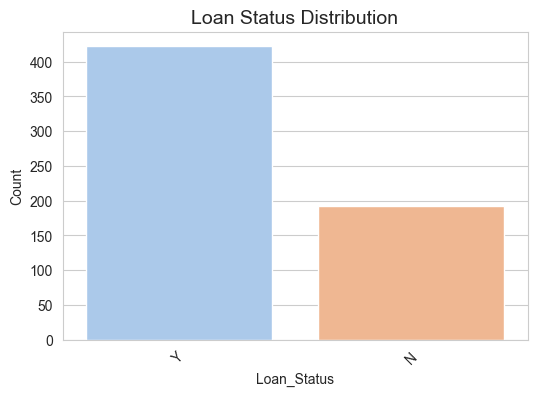

Target variable distribution (%):
 Loan_Status
Y    68.73
N    31.27
Name: proportion, dtype: float64


C:\Users\denni\AppData\Local\Temp\ipykernel_2384\898271640.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\denni\AppData\Local\Temp\ipykernel_2384\898271640.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\denni\AppData\Local\Temp\ipykernel_2384\898271640.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\denni\AppData\Local\Temp\ipykernel_2384\898271640.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue

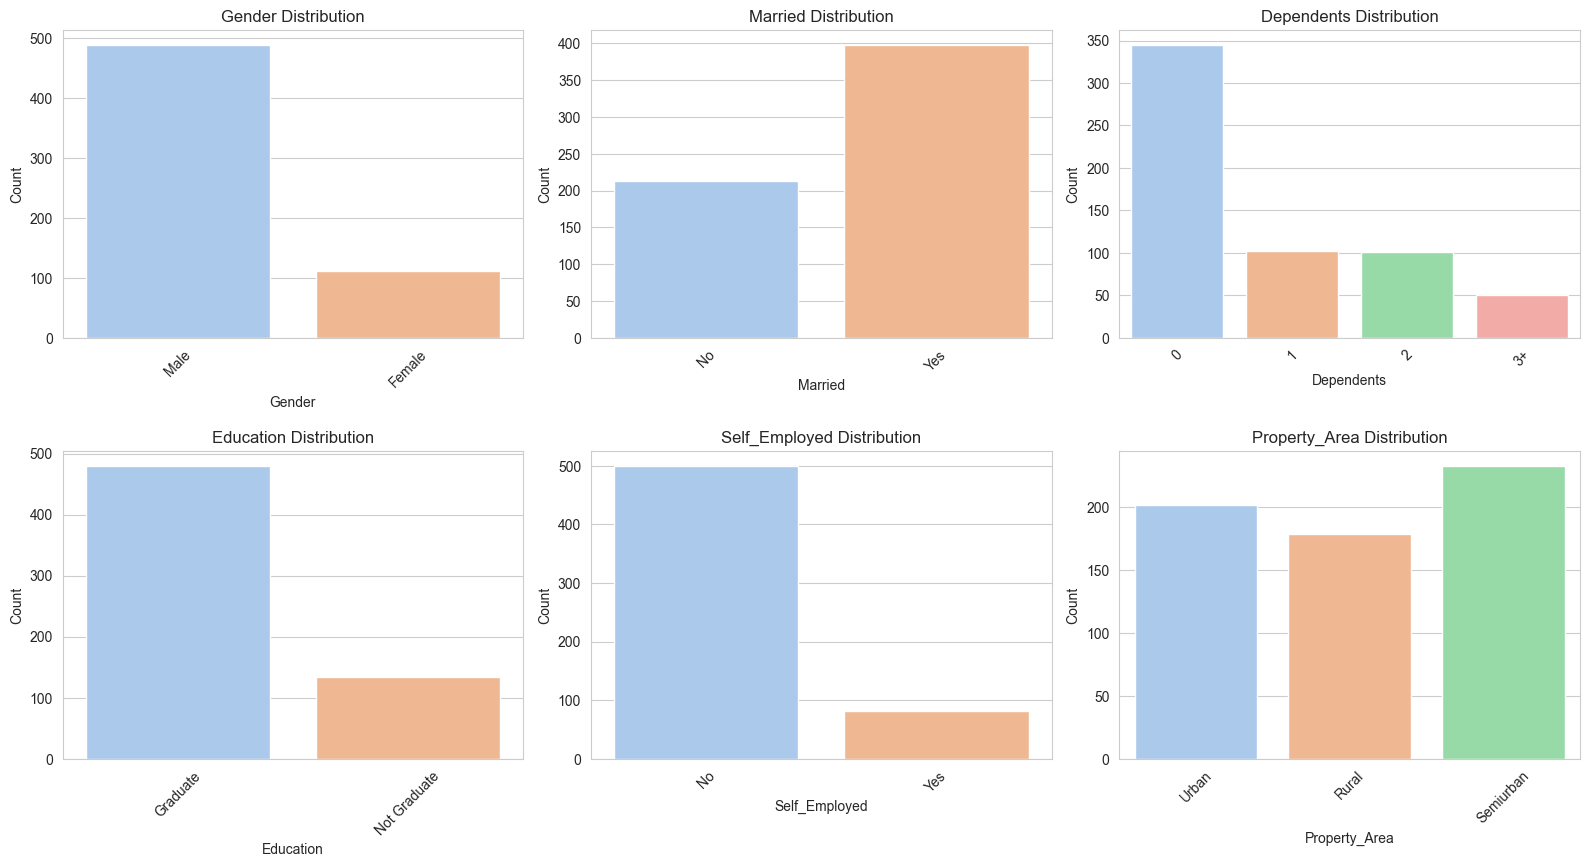

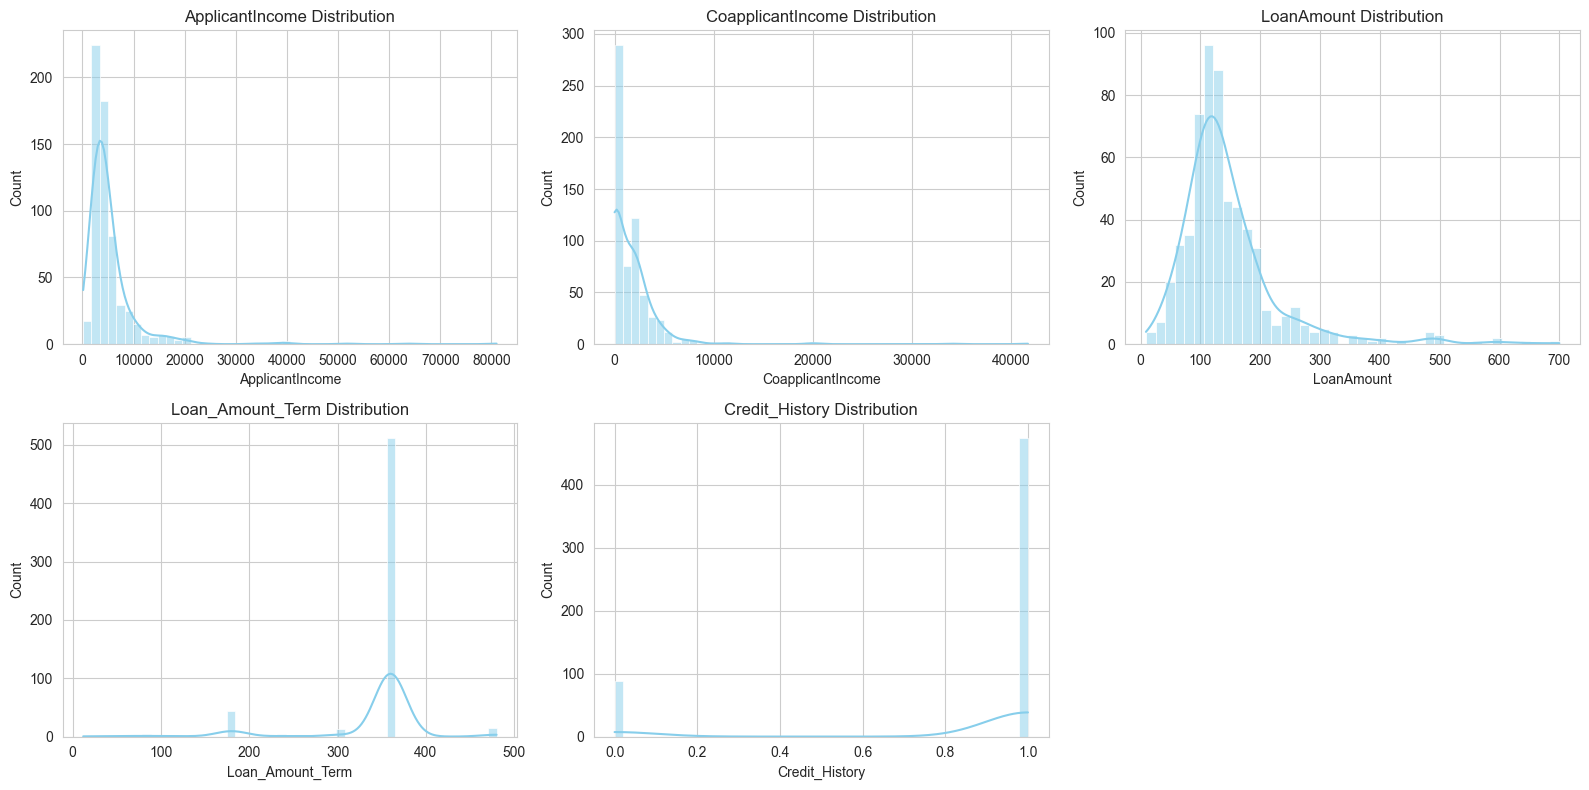

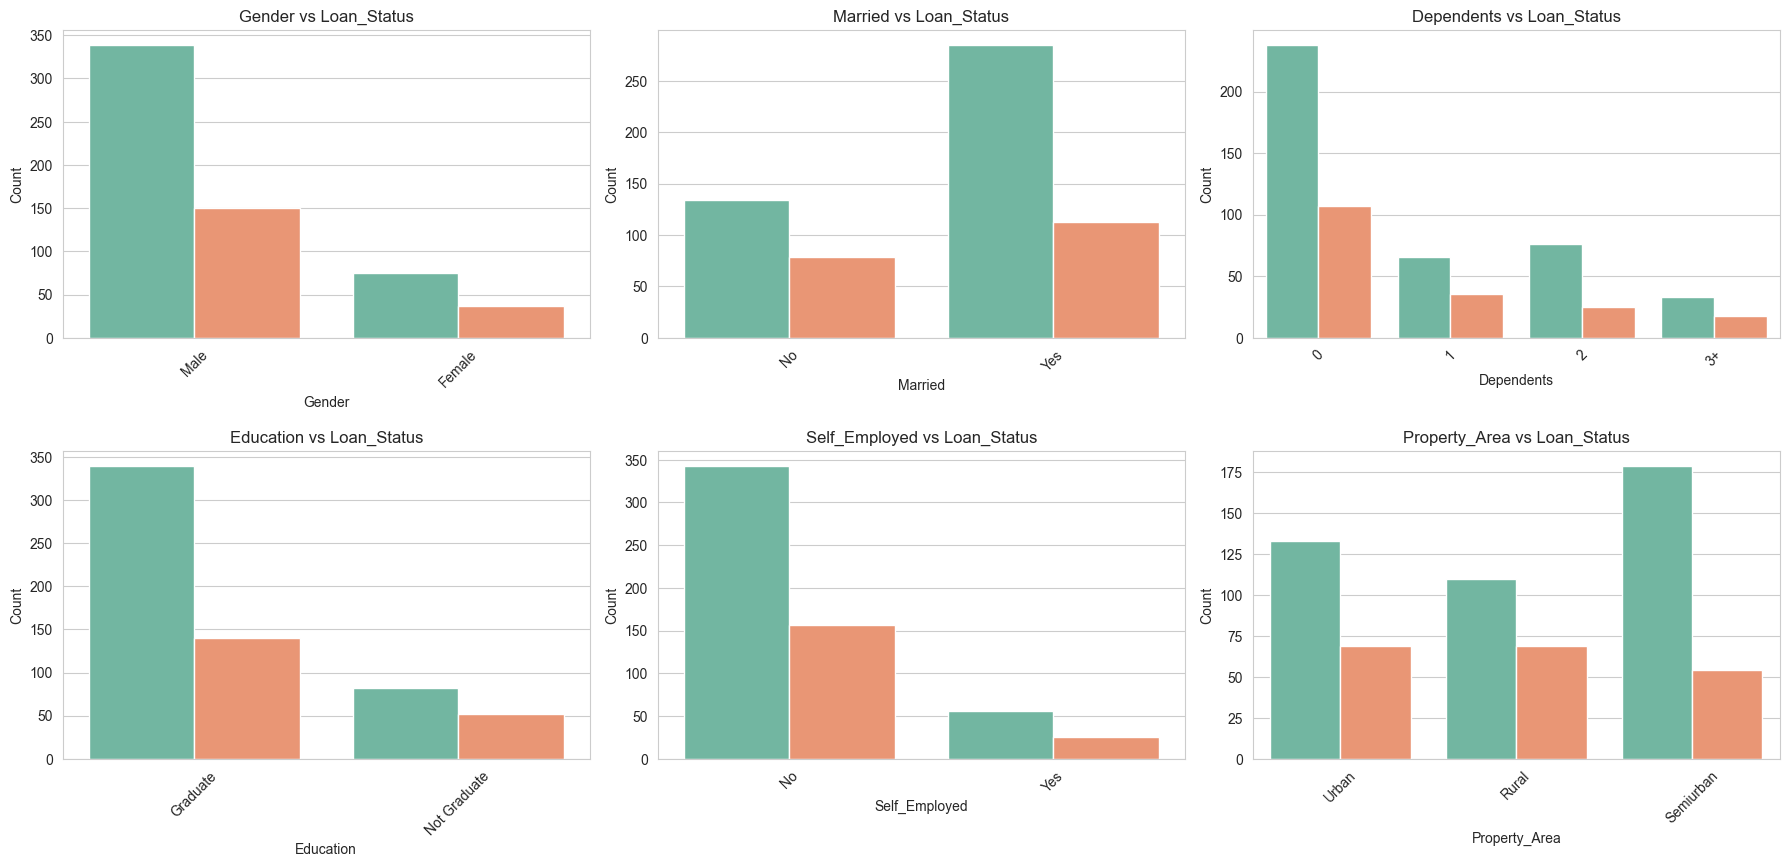

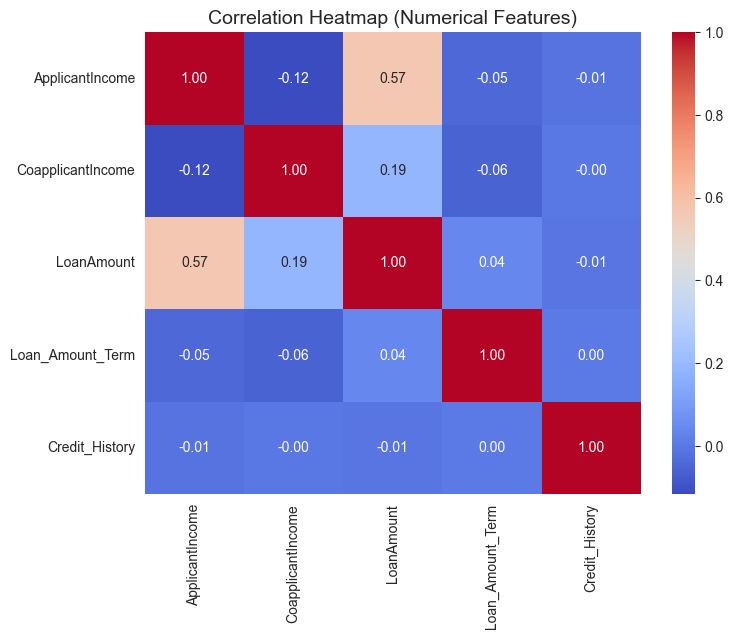

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")  # Clean background
sns.set_palette("pastel")   # Consistent palette

# -------------------------------------------------------------------
# Utility function: safe countplot (handles hue=None, legend=False)
# -------------------------------------------------------------------
def safe_countplot(data, x, ax, palette='pastel', hue=None, order=None):
    sns.countplot(
        data=data,
        x=x,
        hue=hue,
        palette=palette,
        order=order,
        legend=False,
        ax=ax
    )
    ax.set_xlabel(x, fontsize=10)
    ax.set_ylabel("Count", fontsize=10)
    ax.tick_params(axis='x', rotation=45)

# -------------------------------------------------------------------
# 3.1 Target Variable Distribution
# -------------------------------------------------------------------
plt.figure(figsize=(6, 4))
safe_countplot(train_df, 'Loan_Status', plt.gca())
plt.title("Loan Status Distribution", fontsize=14)
plt.show()

# Percentage distribution
target_dist = train_df['Loan_Status'].value_counts(normalize=True) * 100
print("Target variable distribution (%):\n", target_dist.round(2))

# -------------------------------------------------------------------
# 3.2 Categorical Feature Distributions
# -------------------------------------------------------------------
categorical_cols = train_df.select_dtypes(include=['object']).columns.tolist()
categorical_cols = [col for col in categorical_cols if col not in ['Loan_ID', 'Loan_Status']]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 12))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    safe_countplot(train_df, col, axes[i])
    axes[i].set_title(f"{col} Distribution", fontsize=12)

# Remove unused axes
for j in range(len(categorical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# -------------------------------------------------------------------
# 3.3 Numerical Feature Distributions
# -------------------------------------------------------------------
numeric_cols = train_df.select_dtypes(include=[np.number]).columns.tolist()

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 8))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(
        train_df[col],
        kde=True,
        color='skyblue',
        ax=axes[i]
    )
    axes[i].set_title(f"{col} Distribution", fontsize=12)
    axes[i].set_xlabel(col)

for j in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# -------------------------------------------------------------------
# 3.4 Categorical vs Target Relationship
# -------------------------------------------------------------------
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    safe_countplot(train_df, col, axes[i], hue='Loan_Status', palette='Set2')
    axes[i].set_title(f"{col} vs Loan_Status", fontsize=12)

for j in range(len(categorical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# -------------------------------------------------------------------
# 3.5 Correlation Heatmap
# -------------------------------------------------------------------
plt.figure(figsize=(8, 6))
corr_matrix = train_df[numeric_cols].corr()
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    cbar=True
)
plt.title("Correlation Heatmap (Numerical Features)", fontsize=14)
plt.show()


In [4]:
def safe_countplot(data, x, ax, palette='pastel', hue=None, order=None):
    sns.countplot(
        data=data,
        x=x,
        hue=hue,
        palette=palette,
        order=order,
        legend=False,
        ax=ax
    )
    ax.set_xlabel(x, fontsize=10)
    ax.set_ylabel("Count", fontsize=10)
    ax.tick_params(axis='x', rotation=45)

Target Variable Distribution

C:\Users\denni\AppData\Local\Temp\ipykernel_2384\3694801358.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


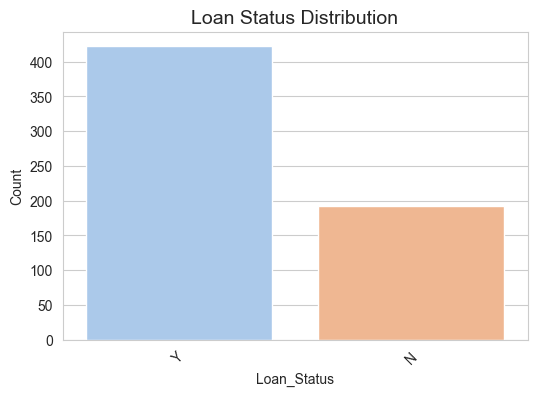

Target variable distribution (%):
 Loan_Status
Y    68.73
N    31.27
Name: proportion, dtype: float64


In [5]:
# Target variable distribution
plt.figure(figsize=(6, 4))
safe_countplot(train_df, 'Loan_Status', plt.gca())
plt.title("Loan Status Distribution", fontsize=14)
plt.show()

# Percentage distribution
target_dist = train_df['Loan_Status'].value_counts(normalize=True) * 100
print("Target variable distribution (%):\n", target_dist.round(2))

Categorical Feature Distributions

C:\Users\denni\AppData\Local\Temp\ipykernel_836\3694801358.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\denni\AppData\Local\Temp\ipykernel_836\3694801358.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\denni\AppData\Local\Temp\ipykernel_836\3694801358.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\denni\AppData\Local\Temp\ipykernel_836\3694801358.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` an

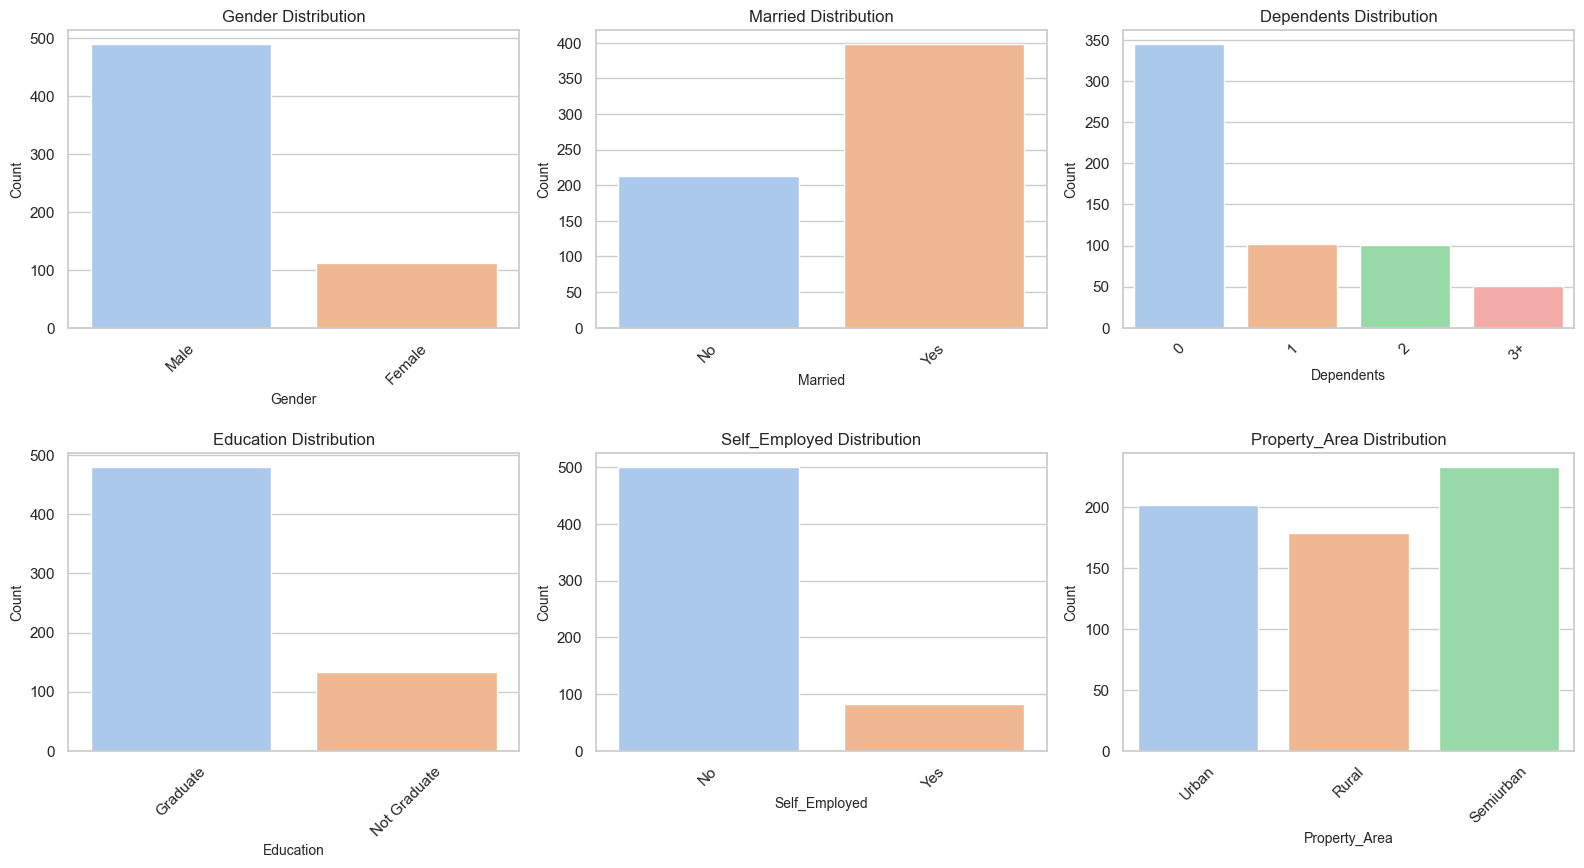

In [9]:
# Identify categorical features
categorical_cols = train_df.select_dtypes(include=['object']).columns.tolist()
categorical_cols = [col for col in categorical_cols if col not in ['Loan_ID', 'Loan_Status']]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 12))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    safe_countplot(train_df, col, axes[i])
    axes[i].set_title(f"{col} Distribution", fontsize=12)

# Remove unused axes
for j in range(len(categorical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Numerical Feature Distributions

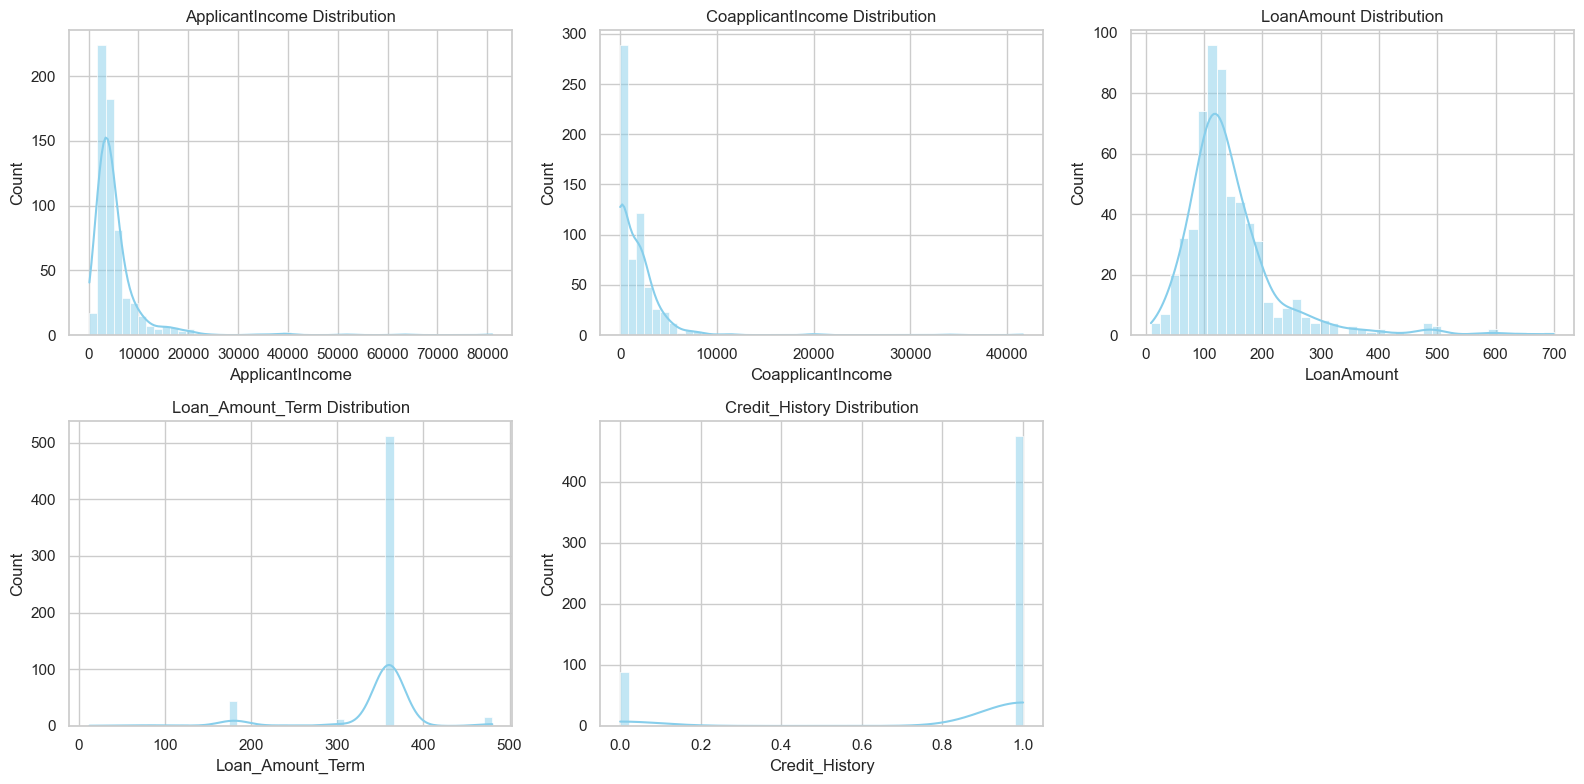

In [16]:
# Identify numerical features
numeric_cols = train_df.select_dtypes(include=[np.number]).columns.tolist()

# Plot histograms
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16,8))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(
        train_df[col], 
        kde=True, 
        color='skyblue', 
        ax=axes[i]
    )
    axes[i].set_title(f"{col} Distribution", fontsize=12)
    axes[i].set_xlabel(col)

# Remove unused subplots
for j in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



Bivariate Analysis – Categorical vs Target

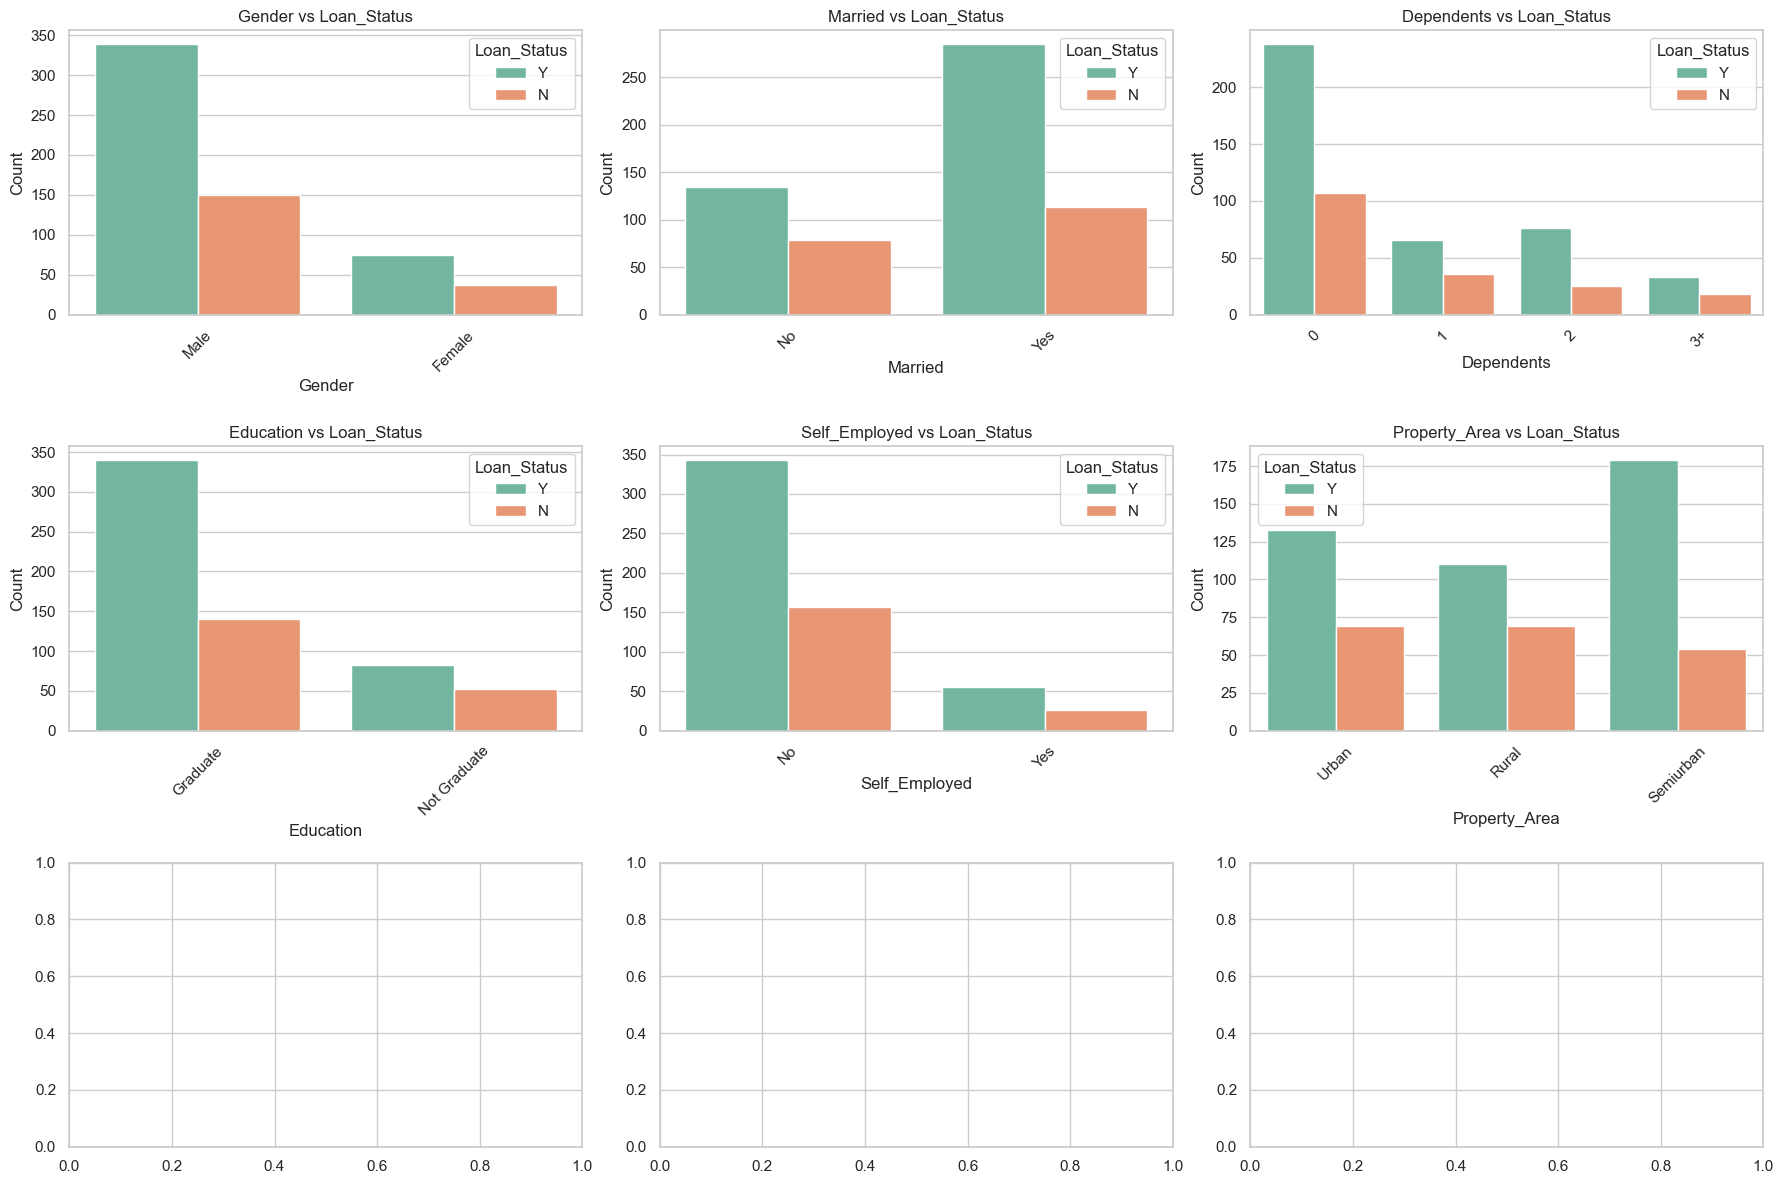

In [19]:
# Relationship between categorical features and Loan_Status
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18,12))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(data=train_df, x=col, hue='Loan_Status', palette='Set2', ax=axes[i])
    axes[i].set_title(f"{col} vs Loan_Status")
    axes[i].set_ylabel("Count")
    axes[i].set_xlabel(col)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


Correlation Heatmap for Numerical Features

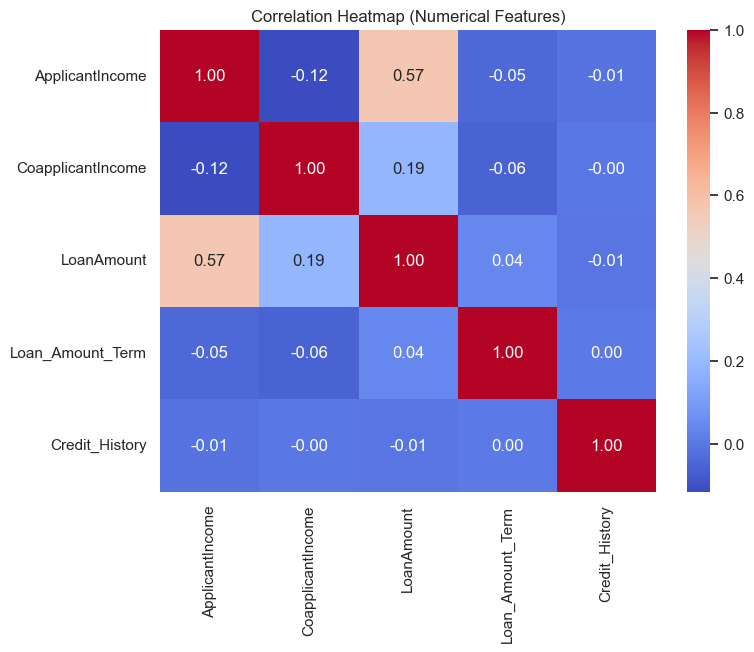

In [20]:
# Correlation heatmap
plt.figure(figsize=(8,6))
corr_matrix = train_df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()


## EDA Summary

From our exploratory data analysis, we observed the following:

### Target Variable (`Loan_Status`)
- Around **69%** of loans in the training data were approved (`Y`), while **31%** were rejected (`N`).
- This indicates **class imbalance**, but not extreme.

### Categorical Features
- **Gender**: Males dominate the applicant pool.
- **Married**: Most applicants are married.
- **Education**: Majority are graduates.
- **Self_Employed**: Most applicants are not self-employed.
- **Property_Area**: Semiurban areas have slightly more applicants.

### Numerical Features
- **ApplicantIncome** and **CoapplicantIncome** are right-skewed — a few applicants have extremely high incomes.
- **LoanAmount** is also right-skewed — many small loans, a few very large ones.
- **Loan_Amount_Term** has a dominant mode at **360 months** (30 years).

### Bivariate Insights
- Higher approval rates are generally seen for:
  - Graduates.
  - Applicants with credit history (`Credit_History = 1`).
  - Applicants from semiurban property areas.
- Credit history appears to be the **most important predictor** of loan approval.

### Correlation Analysis
- Weak correlations between most numerical features.
- `ApplicantIncome` and `LoanAmount` have a small positive correlation.
- Credit history is not numeric in correlation heatmap but shows a **strong relationship** with approval in categorical analysis.

---

### Key Takeaways for Modeling
1. Skewed numerical features should be **log-transformed** for better model performance.
2. `Credit_History` will likely be a **high-importance feature**.
3. Combining `ApplicantIncome` and `CoapplicantIncome` into `TotalIncome` may capture more useful signal.
4. Class imbalance handling might improve predictive power.


# 4. Data Preprocessing

**Importing libraries and making copies of the dataset**

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Make a copy to preserve original data
train_df_prep = train_df.copy()
test_df_prep = test_df.copy()

**Handle Missing Values**

In [23]:
# Identify categorical columns (excluding target & ID)
cat_cols = train_df_prep.select_dtypes(include='object').columns.tolist()
cat_cols = [col for col in cat_cols if col not in ['Loan_ID', 'Loan_Status']]

# Fill missing categorical with mode
for col in cat_cols:
    mode_value = train_df_prep[col].mode()[0]
    train_df_prep[col].fillna(mode_value, inplace=True)
    if col in test_df_prep.columns:
        test_df_prep[col].fillna(mode_value, inplace=True)

# Identify numeric columns
num_cols = train_df_prep.select_dtypes(include=np.number).columns.tolist()

# Fill missing numeric with median
for col in num_cols:
    median_value = train_df_prep[col].median()
    train_df_prep[col].fillna(median_value, inplace=True)
    if col in test_df_prep.columns:
        test_df_prep[col].fillna(median_value, inplace=True)


# 5. Feature Engineering

In [28]:
# Total income
train_df_prep['TotalIncome'] = train_df_prep['ApplicantIncome'] + train_df_prep['CoapplicantIncome']
test_df_prep['TotalIncome'] = test_df_prep['ApplicantIncome'] + test_df_prep['CoapplicantIncome']

# Debt ratio
train_df_prep['DebtRatio'] = train_df_prep['LoanAmount'] / train_df_prep['TotalIncome']
test_df_prep['DebtRatio'] = test_df_prep['LoanAmount'] / test_df_prep['TotalIncome']

**Log Transformation for Skewed Features**

In [29]:
for col in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'TotalIncome']:
    train_df_prep[col] = np.log1p(train_df_prep[col])
    test_df_prep[col] = np.log1p(test_df_prep[col])

**Encode Categorical Variables**

In [30]:
# Separate target variable
y = train_df_prep['Loan_Status'].map({'Y':1, 'N':0})  # Encode target as 1/0
X = train_df_prep.drop(columns=['Loan_ID', 'Loan_Status'])
X_test_final = test_df_prep.drop(columns=['Loan_ID'])

# Identify categorical and numeric columns
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numeric_features = X.select_dtypes(exclude=['object']).columns.tolist()

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Preprocessing for numeric data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

# Combine into column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)

Training set shape: (491, 13)
Validation set shape: (123, 13)


# 6. Model Building

We will compare the performance of multiple models using **Stratified K-Fold cross-validation**.  
This ensures each fold has the same proportion of approved/rejected loans as the overall dataset.

We will evaluate:
- **Logistic Regression** – simple baseline.
- **Random Forest Classifier** – ensemble of decision trees.
- **Gradient Boosting Classifier** – sequential boosting.
- **XGBoost Classifier** – optimized gradient boosting.
- **LightGBM Classifier** – fast gradient boosting.
- **CatBoost Classifier** – gradient boosting optimized for categorical features.

### Evaluation Metrics
- **Accuracy** – overall correctness.
- **F1-score** – balance between precision and recall.
- **ROC-AUC** – ability to distinguish between approved and rejected loans.

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import warnings
warnings.filterwarnings("ignore")

# Ensure target variable is numeric
y = train_df_prep['Loan_Status'].map({'Y': 1, 'N': 0})
X = train_df_prep.drop(columns=['Loan_ID', 'Loan_Status'])

# Prepare preprocessed data (One-Hot Encode categorical features)
X = pd.get_dummies(X, drop_first=True)
X_test_final = pd.get_dummies(test_df_prep.drop(columns=['Loan_ID']), drop_first=True)

# Align test set with train set columns (avoid mismatched columns)
X_test_final = X_test_final.reindex(columns=X.columns, fill_value=0)

# Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Models to evaluate
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=200, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=200, eval_metric='logloss', use_label_encoder=False, random_state=42),
    "LightGBM": LGBMClassifier(n_estimators=200, random_state=42),
    "CatBoost": CatBoostClassifier(n_estimators=200, verbose=0, random_state=42)
}

# Function to evaluate models
def evaluate_model(model, X, y):
    acc = cross_val_score(model, X, y, cv=skf, scoring='accuracy').mean()
    f1 = cross_val_score(model, X, y, cv=skf, scoring='f1').mean()
    roc = cross_val_score(model, X, y, cv=skf, scoring='roc_auc').mean()
    return acc, f1, roc

# Store results
results = []

for name, model in models.items():
    acc, f1, roc = evaluate_model(model, X, y)
    results.append({
        "Model": name,
        "Accuracy": round(acc, 4),
        "F1-score": round(f1, 4),
        "ROC-AUC": round(roc, 4)
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)
results_df.sort_values(by="ROC-AUC", ascending=False, inplace=True)
results_df


ModuleNotFoundError: No module named 'sklearn'

# **old models**

# 5. Determining the best classifier for the prediction by accuracy


## Using Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clasifier= RandomForestClassifier()
rf_clasifier.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
from sklearn import metrics
y_pred= rf_clasifier.predict(X_test)

print("According to Random Forest Prediction Percentage is ", metrics.accuracy_score(y_pred, y_test))
y_pred

According to Random Forest Prediction Percentage is  0.8246753246753247


array([1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0])

## Using Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
NB_CLF= GaussianNB()
NB_CLF.fit(X_train, y_train)

,priors,None
,var_smoothing,1e-09


In [ ]:
y_pred= NB_CLF.predict(X_test)

print("According to GaussianNB Prediction Percentage is ", metrics.accuracy_score(y_pred, y_test))
y_pred

According to GaussianNB Prediction Percentage is  0.8311688311688312


array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0])

## Using Decision Tree Classifier


In [ ]:
from sklearn.tree import DecisionTreeClassifier

DT_CLSIFIER= DecisionTreeClassifier()
DT_CLSIFIER.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [ ]:
y_pred= DT_CLSIFIER.predict(X_test)

print("According to DecisionTreeClassifier, Prediction Percentage is ", metrics.accuracy_score(y_pred, y_test))

According to DecisionTreeClassifier, Prediction Percentage is  0.6883116883116883


In [ ]:
y_pred

array([1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

## Using KNeighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KN_CLSIFIER= KNeighborsClassifier()
KN_CLSIFIER.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [ ]:
y_pred= KN_CLSIFIER.predict(X_test)

print("According to KNeighborsClassifier, Prediction Percentage is ", metrics.accuracy_score(y_pred, y_test))

According to KNeighborsClassifier, Prediction Percentage is  0.8116883116883117


## Using SVM Classifier


In [ ]:
from sklearn.svm import SVC
SCV_clf = SVC()
SCV_clf.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [ ]:
y_pred = SCV_clf.predict(X_test)

print("According to SVC classifier, Prediction Percentage is ", metrics.accuracy_score(y_pred, y_test))

According to SVC classifier, Prediction Percentage is  0.8311688311688312


In [ ]:
y_pred


array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0])

After using the various classifier, the SVM classifier has the best accuracy of the prediction with 83.1%

# 6. Importing the Testing Data and Preprocessing it


In [ ]:
dfd = pd.read_csv('loan_data/test_Y3wMUE5_7gLdaTN.csv')

In [ ]:
dfd


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [ ]:
dfd.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [ ]:
dfd.describe()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [ ]:
dfd.isnull().sum()


Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [ ]:
dfd.head(10)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban


## Dividing the dataset into Independent and Dependent dataset

x have Independent dataset

y have Dependent dataset

In [ ]:
test_x = data.iloc[:,np.r_[1:5,9:11,13:15]].values
test_y = data.iloc[:,12].values

## Label Encoding

In [ ]:
for i in range(0, 5):
    test_x[:,i]= labelEncoder_x.fit_transform(test_x[:,i])
    test_x[:,7]= labelEncoder_x.fit_transform(test_x[:,7])

In [ ]:
test_x

array([[1, 0, 0, ..., 1.0, 4.857444178729352, 320],
       [1, 1, 1, ..., 1.0, 4.852030263919617, 333],
       [1, 1, 0, ..., 1.0, 4.189654742026425, 42],
       ...,
       [1, 1, 1, ..., 1.0, 5.53338948872752, 436],
       [1, 1, 2, ..., 1.0, 5.231108616854587, 416],
       [0, 0, 0, ..., 0.0, 4.890349128221754, 185]],
      shape=(614, 8), dtype=object)

In [ ]:
test_y = labelEncoder_y.fit_transform(test_y)

In [ ]:
test_x=SS.fit_transform(test_x)

In [ ]:
Y_pred = SCV_clf.predict(test_x)
Y_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,

1 predict that loan can approved

0 predict loan can not approved